```php

1. Describe data, using statistics and graph, summarize finding

2. Use the data in file "Bank Customer Details.csv", build model to classify wheather the customer stay with the bank or not. Evaluate and explain your model and reason of choosing that model

3. Test your model again with standout data in file "test_sample_data.csv". Explain your results

```

# **Import Librabry**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# **Data processing**

In [2]:
# Import data
data = pd.read_excel(r'Bank-Customer-Details.xlsx')

# Import variable description
detail = pd.read_excel(r'Bank-Customer-Details.xlsx',sheet_name='Details',skiprows=2)
detail.columns = ['Name of variable','Meaning']

# Import testing data
test_data = pd.read_csv(r'test_sample_data.csv')

In [3]:
# Variable description
detail

,Name of variable,Meaning
0,CustomerId,customer identificiation number by bank system
1,CreditScore,"Credit score estimated by bank, customer with ..."
2,Geography,Customer open account according to bank's bran...
3,Gender,Male or female
4,Age,Age in years
5,Tenure,Length of time with bank
6,Balance,Bank balance of customer (unit: VND)
7,NumOfProducts,Number of Bank products the customer is utilising
8,EstimatedSalary,Estimated Salary of customer yearly (unit: VND)
9,SpendingScore,Spending score range from 0 to 100


# **Descriptive statistics**

In [4]:
# Check NaN values ​​in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       9000 non-null   int64 
 1   CreditScore      9000 non-null   int64 
 2   Geography        9000 non-null   object
 3   Gender           9000 non-null   object
 4   Age              9000 non-null   int64 
 5   Tenure           9000 non-null   int64 
 6   Balance          9000 non-null   int64 
 7   NumOfProducts    9000 non-null   int64 
 8   EstimatedSalary  9000 non-null   int64 
 9   SpendingScore    9000 non-null   int64 
 10  Family           9000 non-null   object
 11  Exited           9000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 843.9+ KB


In [5]:
numerical_features = ['CreditScore','Age','Balance', 'EstimatedSalary', 'SpendingScore']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  5


In [6]:
data.NumOfProducts = data.NumOfProducts.astype('object')
data.Tenure = data.Tenure.astype('object')
categorical_features = [x for x in data.columns if (x not in numerical_features and x != 'CustomerId' and x != 'Exited')]
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  5


        We have a sum of 5 continuous variables are 'CreditScore','Age','Balance', 'EstimatedSalary', 'SpendingScore' and 5 discrete variables are 'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'Family' in the dataset.

In [7]:
# Descriptive statistics of continuous variables
data[numerical_features].describe()

,CreditScore,Age,Balance,EstimatedSalary,SpendingScore
count,9000.000000,9000.000000,9.000000e+03,9.000000e+03,9000.000000
mean,650.296111,38.898000,1.678519e+09,4.398055e+08,50.273444
std,96.943138,10.481053,1.373367e+09,2.533351e+08,28.976039
min,350.000000,18.000000,0.000000e+00,5.100000e+04,1.000000
25%,583.000000,32.000000,0.000000e+00,2.238330e+08,25.000000
50%,651.000000,37.000000,2.139412e+09,4.396615e+08,50.000000
75%,718.000000,44.000000,2.806643e+09,6.564368e+08,76.000000
max,850.000000,92.000000,5.519758e+09,8.799670e+08,100.000000


In [8]:
# Descriptive statistics of discrete variables
data[categorical_features].describe()

,Geography,Gender,Tenure,NumOfProducts,Family
count,9000,9000,9000,9000,9000
unique,3,2,10,4,4
top,North,Male,1,1,Single
freq,4541,4918,1338,4584,5644


# **Visualization the dataset**

In [9]:
############# Histogram numerical variable ############
fig, axs = plt.subplots(2,5, figsize=(25,15),dpi = 500)
sns.set()

axs[0,0].hist(data['CreditScore'], bins = 15, color='coral')
axs[0,0].set_title('CreditScore')

axs[0,1].hist(data['Age'], bins = 15, color='coral')
axs[0,1].set_title('Age')

axs[0,2].hist(data['EstimatedSalary'], bins=15,color='coral') 
axs[0,2].set_ylim(540)
axs[0,2].set_title('EstimatedSalary')

axs[0,3].hist(data['Balance'], bins = 15, color='coral')
axs[0,3].set_title('Balance')

axs[0,4].hist(data['SpendingScore'], bins = 15, color='coral')
axs[0,4].set_title('SpendingScore')
axs[0,4].set_ylim(450)

############ Histogram categorical variable ############
axs[1,0].hist(data['Geography'], color='c')
axs[1,0].set_title('Geography')

axs[1,1].hist(data['Family'], color='c')
axs[1,1].set_title('Family')

axs[1,2].hist(data['Tenure'], color='c')
axs[1,2].set_title('Tenure')
axs[1,2].set_ylim(200)

axs[1,3].hist(data['Gender'], color='c')
axs[1,3].set_title('Gender')

axs[1,4].hist(data['NumOfProducts'], color='c')
axs[1,4].set_title('NumOfProducts')

fig.tight_layout()

***Comment:***

       Through the statistical table describing the continuous variable, the dependent variable and the data visualization chart, we can see some characteristics of the dataset as follows:
       
       In this data set, the set of customers from North is the largest, including 4541 people. Male customers make up the majority with 4918 people. Most users have a length of time with bank of 1 year and the number of products used a lot is 1 product. In addition, the majority of customers are Single with 5644 people. The highest credit score is 850 points, and is concentrated in the range of 600 to 650 points. The average age of customers is 39 years old. The average spending score of customers is 50 points, the most concentrated from about 25 to 76 points.

        In addition, there are many customers who have an account at the bank but have a maintenance balance of 0. These sets of customers leave or stay with almost no impact on customers.Therefore, we remove customers with a zero account balance.

In [10]:
# remove customers with a zero account balance 
data = data[data.Balance != 0]

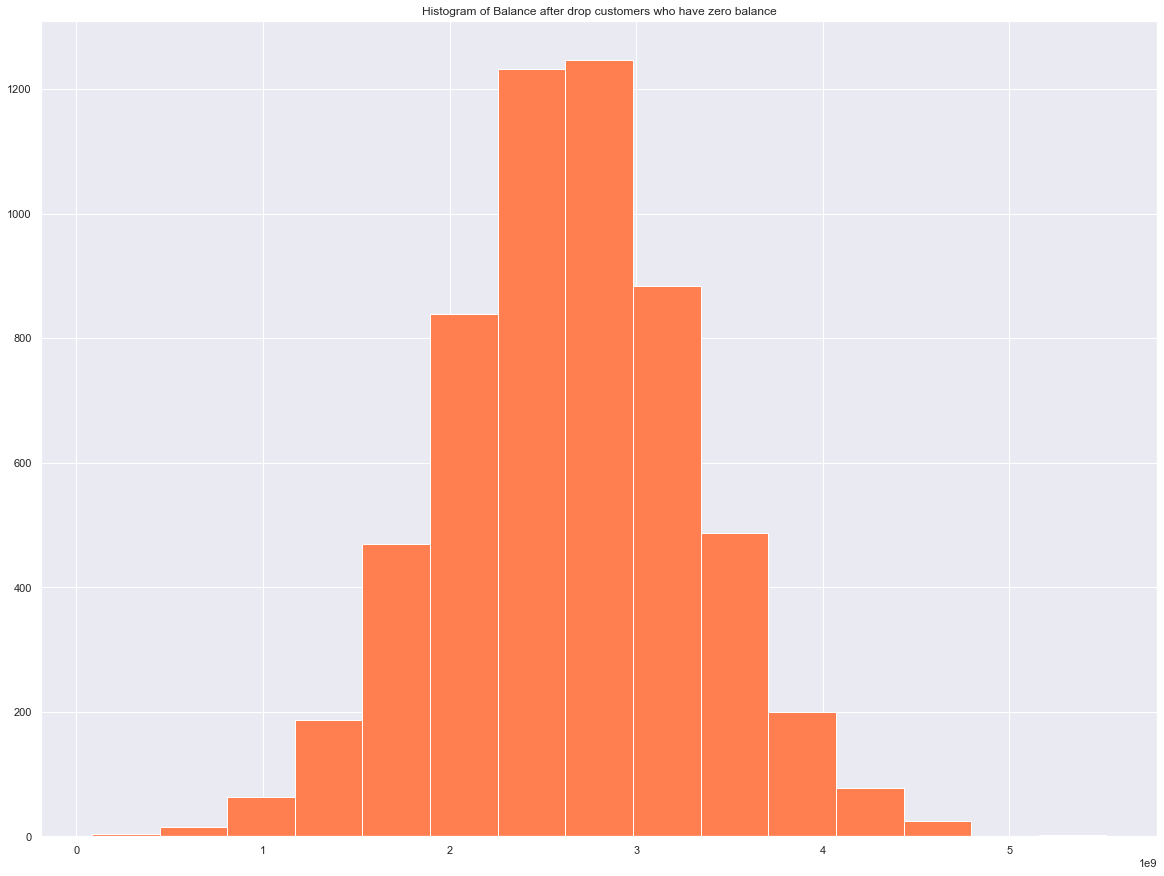

In [11]:
plt.figure(figsize=(20,15))
plt.hist(data['Balance'], bins = 15, color='coral')
plt.title('Histogram of Balance after drop customers who have zero balance')
plt.show()

**Check the balance properties of the data**

In [12]:
# Check the balance of the variable Exited.
exited_count = data.value_counts(['Exited'])
print(exited_count,'\n')

print(f'The number of observations difference between class 0 and class 1 is', int(data.value_counts(['Exited'])[0]/data.value_counts(['Exited'])[1]),'times')

Exited
0         5096
1          633
dtype: int64 

The number of observations difference between class 0 and class 1 is 8 times


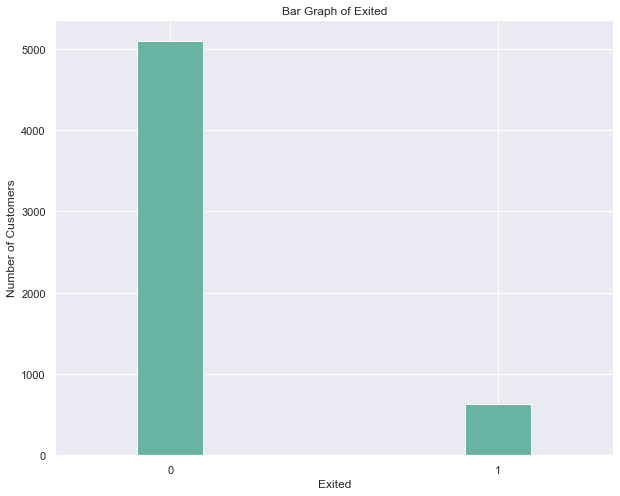

In [13]:
# Exited
plt.figure(figsize=(10, 8))

ax = exited_count.plot(kind='bar', rot=0,width=0.2,color='#69b3a2')
ax.set_title("Bar Graph of Exited", y = 1)
ax.set_xlabel('Exited')
ax.set_ylabel('Number of Customers')
ax.set_xticklabels(('0', '1'))  
plt.show()

***Comment:***  

        Through the above results, we can see that this dataset is experiencing imbalance in the dependent variable. Therefore, we need to handle them to avoid the dangerous effects of this phenomenon to the forecasting model.

In [14]:
# Remove customers with a zero account balance on the test dataset
test_data = test_data[test_data.Balance != 0]

In [15]:
# Check the balance of the variable Exited in the test dataset
exited_test_count = test_data.value_counts('Exited')
print(exited_test_count,'\n')

print(f'The number of observations difference between class 0 and class 1 is', int(test_data.value_counts(['Exited'])[0]/test_data.value_counts(['Exited'])[1]),'times')

Exited
0    581
1     73
dtype: int64 

The number of observations difference between class 0 and class 1 is 7 times


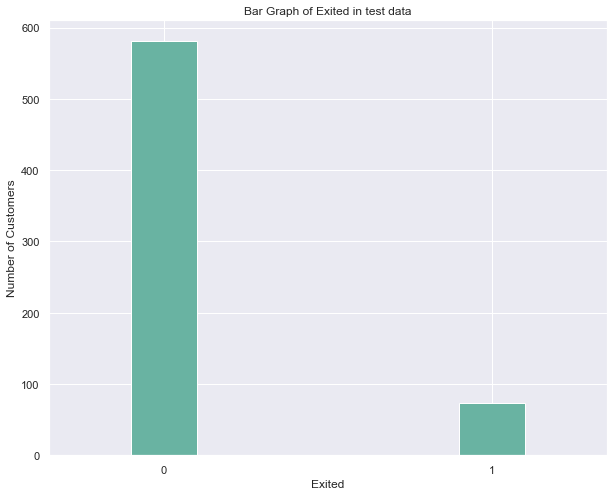

In [16]:
# Exited
plt.figure(figsize=(10, 8))

ax = exited_test_count.plot(kind='bar', rot=0,width=0.2,color='#69b3a2')
ax.set_title("Bar Graph of Exited in test data", y = 1)
ax.set_xlabel('Exited')
ax.set_ylabel('Number of Customers')
ax.set_xticklabels(('0', '1'))  
plt.show()

# **Encoding**

        Machine learning algorithms work best with numerical data. However, in our dataset, we have two categorical columns: Geography, Gender, and Family. These two columns contain data in textual format; we need to convert them to numeric columns.

**1. Encoding dataset**

In [17]:
# Build an encoding function based on the three input parameters which are the dataframe name, the variable name appended with 1, and the name of old variable from the dataframe
def coding_binary(df,x,features):
    list_binary = []
    for i in df[features]:
        if i == x:
            coding = 1
            list_binary.append(coding)
        else:
            coding = 0
            list_binary.append(coding)
    return list_binary

        One way to convert categorical columns to numeric columns is to replace each category with a number. In the Gender column, male can be replaced with 0 and female with 1. This works for columns with only two categories.

In [18]:
# Encoding Male = 0 and Female = 1
data.Gender = coding_binary(data,'Female','Gender')

# Create the exited variable from the Exited column
exited = data['Exited']

***Commnent:***

        For a column like Geography with three categories, we can use the values 0, 1, and 2 for the three regions of North, Mid, and South. However, if we do this, the machine learning algorithms will assume that there is an ordinal relationship between the three countries. In other words, the algorithm will assume that 2 is greater than 1 and 0, which actually is not the case in terms of the underlying countries the numbers represent. Therefore, we will create dummy variables equal to the number of components of the original variable. 
        
        In the Geography example, we take our categories (North, Mid, South) and represent them with columns. In each column, we use a 1 to designate that the category exists for the current row, and a 0 otherwise. We also apply this approach to the Family variable.

In [19]:
# The get_dummies method of the pandas library converts categorical columns to numeric columns
geography = pd.get_dummies(data.Geography).iloc[:,:]

family = pd.get_dummies(data.Family).iloc[:,:]
family = family.drop(['Not specified'],axis=1)

# Drop object variables after encoding
data.drop(['Geography','Family','Exited'],axis=1,inplace=True)

In [20]:
# Adding the geography and family dataframes back to the dataset to create the final dataset. We use the concat function from pandas to horizontally concatenate dataframes
data = pd.concat([data,geography,family,exited], axis=1)
data.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Mid,North,South,Divorced,Married,Single,Exited
0,15586133,666,1,44,2,2690919000,1,301729000,18,1,0,0,0,1,0,0
1,15713354,597,1,22,4,2233629000,1,310328000,45,1,0,0,0,0,1,0
2,15710390,655,1,39,6,2081888000,2,655373000,12,0,1,0,0,1,0,0
4,15568449,661,0,38,7,3146147000,1,68864000,44,0,0,1,0,0,1,0
6,15801441,670,1,35,2,1750891000,1,874733000,89,1,0,0,0,1,0,0


In [21]:
# Statistics
data[data.columns[1:]].describe()

,CreditScore,Gender,Age,Balance,EstimatedSalary,SpendingScore,Mid,North,South,Divorced,Married,Single,Exited
count,5729.000000,5729.000000,5729.000000,5.729000e+03,5.729000e+03,5729.000000,5729.000000,5729.000000,5729.000000,5729.000000,5729.000000,5729.000000,5729.000000
mean,651.156048,0.452610,39.213824,2.636877e+09,4.419294e+08,50.481236,0.391691,0.409670,0.198639,0.006284,0.369698,0.619654,0.110490
std,97.340566,0.497793,10.485850,6.600836e+08,2.524761e+08,29.107212,0.488171,0.491816,0.399010,0.079028,0.482765,0.485514,0.313528
min,350.000000,0.000000,18.000000,8.291100e+07,5.100000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,2.208110e+09,2.269830e+08,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,38.000000,2.638858e+09,4.434820e+08,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,718.000000,1.000000,44.000000,3.068852e+09,6.572910e+08,76.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,5.519758e+09,8.798710e+08,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**2. Encoding the test dataset**

In [22]:
# Encoding Male = 0 and Female = 1
test_data.Gender = coding_binary(test_data,'Female','Gender')

# Create the CostumerExited from the Exited variable
exited_test = test_data['Exited']

In [23]:
# The get_dummies method of the pandas library converts categorical columns to numeric columns
geography_test = pd.get_dummies(test_data.Geography).iloc[:,:]

family_test = pd.get_dummies(test_data.Family).iloc[:,:]
family_test = family_test.drop(['Not specified'],axis=1)

# Drop object variables after encoding
test_data.drop(['Geography','Family','Exited'],axis=1,inplace=True)

In [24]:
# Adding the geography and family dataframes back to the dataset
test_data = pd.concat([test_data,geography_test,family_test,exited_test], axis=1)
test_data.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Mid,North,South,Divorced,Married,Single,Exited
0,15771442,633,0,40,4,3312716000,1,152551000,45,0,1,0,0,0,1,0
1,15700174,733,1,30,1,1833024000,1,254184000,38,0,0,1,0,0,1,0
2,15747503,705,0,44,1,4060147000,1,302985000,39,0,0,1,0,0,1,0
3,15599433,660,0,35,8,1290111000,1,874166000,97,1,0,0,0,0,1,0
5,15738042,543,0,37,8,3099669000,2,519460000,54,1,0,0,0,1,0,0


In [25]:
y_new = test_data.Exited
X_new = test_data.drop(['Exited','CustomerId'],axis=1)

# **Model**

**Data Preprocessing**

        First, we need to isolate the variable that we're predicting from the dataset.

In [26]:
# Set independent variable properties
feature = data.columns[1:len(data.columns)-1].to_list()
target=  [data.columns[-1]]

# Assign dependent and independent variables
y = data.Exited
X = data[feature]

print('Target: ', target)
print('Features: ', feature)

Target:  ['Exited']
Features:  ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'SpendingScore', 'Mid', 'North', 'South', 'Divorced', 'Married', 'Single']


        We divide the data into a training and test set. The training set contains the data that will be used to train our machine learning model. The test set will be used to evaluate how good our model is.

In [27]:
# Split the train and test
n_state = 45
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state=n_state)

**Reasons for choosing the model:**

        There are several machine learning algorithms that can be used to make predictions such as Logistic regression, Decision Tree, Random Forest, ect. However, we'll use the RANDOM FOREST ALGORITHM, since it's simple and one of the most powerful algorithms for classification problems. Besides, Random forest is a supervised learning algorithm that works by building many decision trees based on different samples and making decisions according to the majority or the mean of the classes.

**Running Random Forest Model**

In [28]:
# Build  Random Forest model
RF_classifier = RandomForestClassifier(random_state=n_state)
                                             
# Call the fit method and pass in the feature set (X) and the corresponding label set (y) into the model Random Forest
RF_classifier.fit(X_train, y_train)

# Forecast value of dependent variable
y_pred = RF_classifier.predict(X_test)

# Confused Matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred),'\n')

# Classification report
print('Model report:\n',classification_report(y_test,y_pred))

# Accuracy rate
print('Random Forest accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
 [[1018    0]
 [ 128    0]] 

Model report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1018
           1       0.00      0.00      0.00       128

    accuracy                           0.89      1146
   macro avg       0.44      0.50      0.47      1146
weighted avg       0.79      0.89      0.84      1146

Random Forest accuracy:  0.8883


***Comment:***  
        
        The model gives accuracy = 88.83%, which is relatively high. However, at class 1, the precision, recall and f1-score are zero because this model hardly correctly predicts any customer close the account of the Bank. This is a consequence of the data imbalance phenomenon. Severe data imbalances have led to less accurate forecasts in the minority. Because most of the forecast results are often biased towards the majority group and very poor on the minority group. While the importance of accurately predicting a minority sample is much greater than predicting a majority sample, here the class that the author is interested in is the customer class close account in bank. To improve the forecast results, we need appropriate adjustments to the model to achieve a high accuracy on the minority group. In this exercise, I choose three ways as follows:

        (1) Metric change: instead of focusing on the Accuracy index, we consider some alternative metrics like precision, recall, f1-score. These indicators will not be too large to lead to a misconception of accuracy, and at the same time they focus more on assessing accuracy on the minority group, which we want to forecast more accurately than the majority group. In addition, since we are dealing with exited customers classification, we are more concerned with the coverage of the predictions about the number of customers who close the account (recall) than with the accuracy of the prediction. who will close the account (precision).

        (2) Penalty model: we penalize the model more heavily for the minority prediction error. This approach is to modify the model to find the best predictor results for the minority group

        (3) Over sampling: the methods that help to solve sample imbalance by increasing the sample size of the minority group by different techniques.

        In addition, there are still some other options like under sampling, collect more observations, more variables, experiment with different methods, etc.


**1. Modify model**

        The prediction error of observations in the majority sample will be less severe than the prediction error of observations in the minority sample. To solve that problem, we will impose a heavier penalty on the minority forecast error by assigning it a larger weight in the loss function formula. For example, below in the class_weight argument we will assign the weights of the minority class label 1 to the value 0.9 and the weight class of the majority class 0 to be 0.1.

In [29]:
# Build Decision Tree model
RF_classifier_penalty = RandomForestClassifier(n_estimators=500, 
                                        max_depth = 25 , random_state=n_state, 
                                        min_samples_split = 50 , 
                                        class_weight={0: 0.1, # penalty on the minority
                                                    1: 0.9},
                                        max_features="auto")
                                             
# Call the fit method and pass in the feature set (X) and the corresponding label set (y) into the model Random Forest
RF_classifier_penalty.fit(X_train, y_train)

# Forecast value of dependent variable
y_pred = RF_classifier_penalty.predict(X_test)

# Confused Matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred),'\n')

# Classification report
print('Model report:\n',classification_report(y_test,y_pred))

# Accuracy rate
print('Random Forest accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
 [[982  36]
 [126   2]] 

Model report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1018
           1       0.05      0.02      0.02       128

    accuracy                           0.86      1146
   macro avg       0.47      0.49      0.47      1146
weighted avg       0.79      0.86      0.82      1146

Random Forest accuracy:  0.8586


***Comment:***  

        The results indicate an accuracy of 85.86%, which means that our algorithm successfully predicts customer exited 85.86% of the time. However, the precision, recall and f1-score indexes of class 1 are very low, not according to the author's purpose. The model only correctly predicts 2 customers who close the account out of 128 ways to leave and the recall index is only 0.02 which is very low. However, this result has improved compared to the original model.

In [30]:
# Show what is the most important features in the identification of customer exited
importance_rf = RF_classifier_penalty.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': feature, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
4,Balance,0.176031
0,CreditScore,0.175300
6,EstimatedSalary,0.163720
7,SpendingScore,0.151524
2,Age,0.131701
3,Tenure,0.081553
5,NumOfProducts,0.031099
1,Gender,0.020331
8,Mid,0.014069
12,Married,0.013904


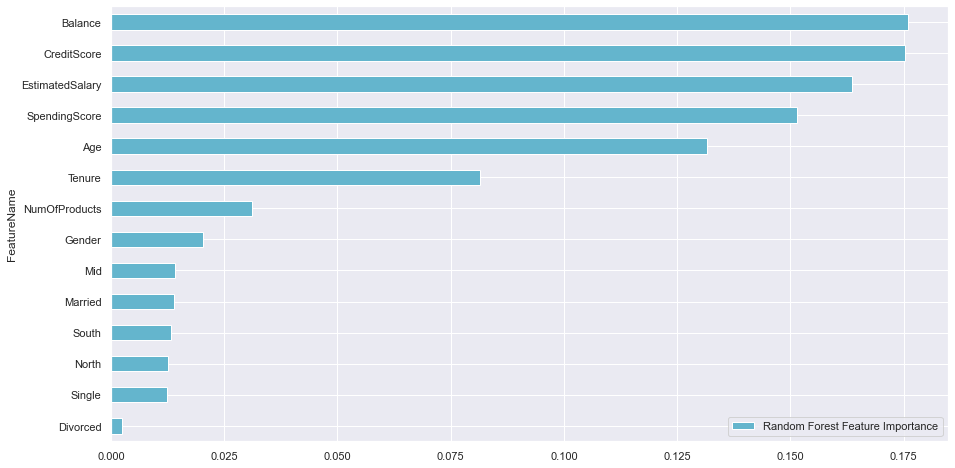

In [31]:
# Visualization Random Forest Feature Importance
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh",color = 'c');

***Comment:***  

        Based on this data, we can see that Balance feature has the highest impact on customer exited, the next 3 strong important attributes are CreditScore, EstimatedSalary, and SpendingScore respectively. Attribute Divorced has the least importance.

**2. Up sampling data**

In [32]:
#  Data contains the values retained account with bank
df_majority = data[data.Exited==0]

#  Data contains the values closed account with bank
df_minority = data[data.Exited==1]

In [33]:
# The orginal shape of data
print('The orginal shape of data:')
print('class 0:', df_majority.shape)
print('class 1:', df_minority.shape)

The orginal shape of data:
class 0: (5096, 16)
class 1: (633, 16)


In [34]:
# First, we'll import the resampling module from Scikit-Learn
from sklearn.utils import resample

# Scale up
df_minority_upsampled = resample(df_minority, 
                                 replace=True,                       # sample with replacement
                                 n_samples= df_majority.shape[0],    # to match majority class
                                 random_state=45)                    # reproducible results

In [35]:
print('The shape of data after up-sampled:')
print('Shape of class 0:', df_majority.shape)
print('Shape of class 1:', df_minority_upsampled.shape)

The shape of data after up-sampled:
Shape of class 0: (5096, 16)
Shape of class 1: (5096, 16)


In [36]:
# Bind 2 classes together into 1 dataframe
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

        After up-sampled, the number of observations of the 2 classes is balance. Thus, it is possible to avoid model errors caused by data imbalance.

In [37]:
# Assign dependent and independent variables
y_upsampled = df_upsampled.Exited
X_upsampled = df_upsampled[feature]

In [38]:
# Split the train and test
n_state = 45
X_upsampled_train, X_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(X_upsampled,y_upsampled, train_size = 0.8, test_size = 0.2, random_state=n_state)

In [39]:
# Build Random Forest model with up-sampled dataset
RF_classifier_upsampled = RandomForestClassifier(random_state=n_state)
                                        
# Putting data X_upsampled_train, y_train into the model Random Forest
RF_classifier_upsampled.fit(X_upsampled_train, y_upsampled_train)

# Forecast value of dependent variable
y_upsampled_pred = RF_classifier_upsampled.predict(X_upsampled_test)

# Confused Matrix
print('Confusion matrix:\n',confusion_matrix(y_upsampled_test,y_upsampled_pred),'\n')

# Classification report
print('Model report:\n',classification_report(y_upsampled_test,y_upsampled_pred))

# Accuracy rate
print('Random Forest accuracy: ', round(accuracy_score(y_upsampled_test, y_upsampled_pred),4))

Confusion matrix:
 [[1002    7]
 [   0 1030]] 

Model report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1009
           1       0.99      1.00      1.00      1030

    accuracy                           1.00      2039
   macro avg       1.00      1.00      1.00      2039
weighted avg       1.00      1.00      1.00      2039

Random Forest accuracy:  0.9966


***Comment:***

        The predictive model after up-sampling the data is extremely good. The model correctly predicted 1030 costumers close the account customers and the recall index is 1. Thus, the model almost covers all the customer sets we are interested in.

In [40]:
importance_rf_upsampled = RF_classifier_upsampled.feature_importances_
features_importances_rf_upsampled = pd.DataFrame({'FeatureName': feature, 'Random Forest Feature Importance after up-sampled': importance_rf_upsampled})
features_importances_rf_upsampled.sort_values(by=['Random Forest Feature Importance after up-sampled'], ascending=False)

,FeatureName,Random Forest Feature Importance after up-sampled
4,Balance,0.174374
6,EstimatedSalary,0.165268
0,CreditScore,0.164971
7,SpendingScore,0.155276
2,Age,0.134393
3,Tenure,0.094737
5,NumOfProducts,0.029627
1,Gender,0.020020
13,Single,0.013343
12,Married,0.012416


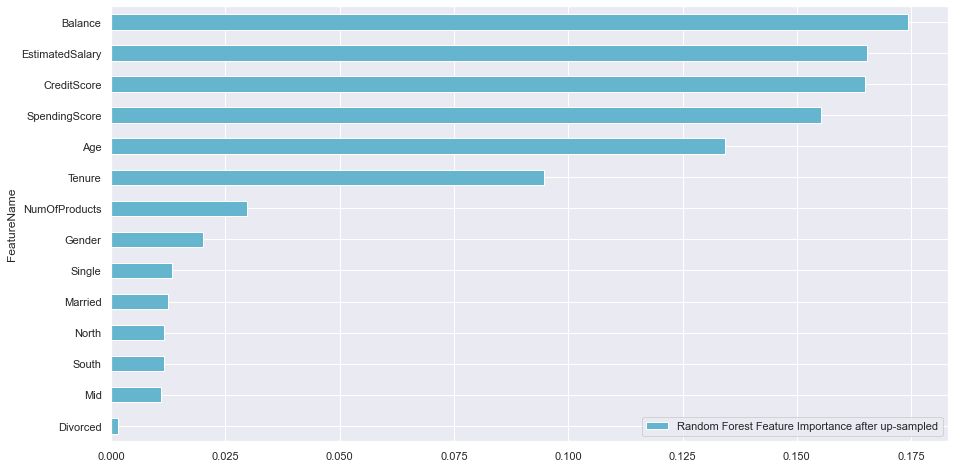

In [41]:
features_importances_rf_upsampled.sort_values("Random Forest Feature Importance after up-sampled").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance after up-sampled"], kind="barh",color='c');

***Comment:***  

        Based on this data, we can see that Balance feature has the highest impact on customer exited, the next 3 strong important attributes are CreditScore, EstimatedSalary, and SpendingScore respectively. Attribute Divorced has the least importance.

# **Test model on new dataset**

**1. Test model on new dataset with the penaty method**

In [42]:
y_new_pred = RF_classifier_penalty.predict(X_new)

print('Confusion matrix:\n',confusion_matrix(y_new,y_new_pred),'\n')
print('Model report:\n',classification_report(y_new,y_new_pred))
print('Random Forest accuracy: ', round(accuracy_score(y_new, y_new_pred),4))

Confusion matrix:
 [[560  21]
 [ 72   1]] 

Model report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       581
           1       0.05      0.01      0.02        73

    accuracy                           0.86       654
   macro avg       0.47      0.49      0.47       654
weighted avg       0.79      0.86      0.82       654

Random Forest accuracy:  0.8578


**2. Test model on new dataset after up-sampling data**

In [43]:
# Forecast value of dependent variable
y_new_pred = RF_classifier_upsampled.predict(X_new)

# Confused Matrix
print('Confusion matrix:\n',confusion_matrix(y_new,y_new_pred),'\n')

# Classification report
print('Model report:\n',classification_report(y_new,y_new_pred))

# Accuracy rate
print('Random Forest accuracy: ', round(accuracy_score(y_new, y_new_pred),4))

Confusion matrix:
 [[579   2]
 [ 73   0]] 

Model report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       581
           1       0.00      0.00      0.00        73

    accuracy                           0.89       654
   macro avg       0.44      0.50      0.47       654
weighted avg       0.79      0.89      0.83       654

Random Forest accuracy:  0.8853


***Comment:***  

            Although the model with the penaty method has an accuracy of 85.78% and accuracy of the model with new dataset after up-sampling data is 88.53%. Both of these models give relatively good theoretical accuracy. At the model with the penaty method has a precision of 0.5 and recall is 0.01, which means there are many customers who close the account but we do not discovere and the correct prediction rate of leaving is 50-50. At the model with new dataset after up-sampling data has the precision index is 0 and the recall is 0, the model hardly discovered people close the account at the bank and do not have correct prediction index. It seems that the model with new dataset after up-sampling data gives a better prediction in terms of accuracy. However, in this problem, we focus on evaluating the recall index more, so we evaluate the model with the penalty method as more suitable for the author's classification needs.
        

# **In summary:**      

        After implementing 2 different methods of fine-tuning the model and up-sampled the data, the author obtained some relatively different results. 
        
        In the model penalty method, the forecasting model gives results on the test data and the new-customer data set has a relatively good accuracy index but cannot predict class 1 well (customers closed the banking account). In the up-sampled data method, the model gives very good forecast results on the test data with the accuracy = 99.66% and also gives very accurate forecasts for the set of customers closed the banking account (high precision and recall at the class 1). However, when forecasting on a new-customer dataset, the model cannot predict the set of customers that the author is interested in. This makes perfect sense because we are modifying the data to give good predictive results on the dataset itself. As for the model penalty method, we modify the model to find the appropriate parameters to predict on the unbalanced dataset. This result can be influenced by three main reasons.

                (1) The new-customer data set is also imbalanced between the two sets of customers closed the banking account and retained.

                (2) The features included in the model are not suitable or are still missing.

                (3) Random Forest model does not work effectively in the classification problem of Banking Customers Exited.
                
        Some directions to overcome the future forecasting model:

                (1) Collect more data to create a balanced dataset

                (2) Researching previous articles to find the appropriate attributes in the classification of the problem of Banking Customers Exited

                (3) Test both traditional and more complex Machine Learning, Deep Learning models.